In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier , RandomForestRegressor , BaggingRegressor

In [52]:
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor

In [2]:
from sklearn.datasets import make_moons

In [14]:
from matplotlib.colors import ListedColormap

## DataSet Generation

In [21]:
X , y = make_moons(n_samples=10000, noise = 0.1 , random_state = 10)
print(X.shape , y.shape)

(10000, 2) (10000,)


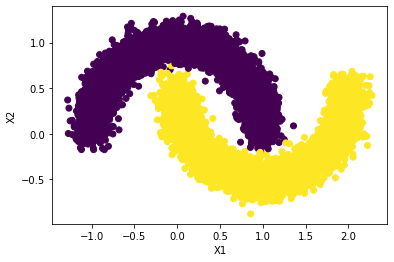

In [22]:
plt.scatter(X[:,0] , X[:,1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [23]:
base_clf = DecisionTreeClassifier(max_depth = 2)  ## base classifier
bag_clf = BaggingClassifier(base_estimator = base_clf , n_estimators = 500 , oob_score = True , max_samples = 100)

In [24]:
bag_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_samples=100, n_estimators=500, oob_score=True)

In [12]:
x1 = np.linspace(X[:,0].min() , X[:,1].max() , 100)
x2 = np.linspace(X[:,1].min() , X[:,1].max() , 100)

x1 , x2 = np.meshgrid(x1,x2)

x1 , x2 = x1.reshape(-1,1) , x2.reshape(-1,1)

x_test = np.concatenate([x1,x2] , axis = 1)
print(x_test.shape)

(10000, 2)


## making prediction using bagging classifier

In [25]:
y_pred = bag_clf.predict(x_test)

## ploting the decision boundary

In [15]:
colors = ["#b3e4f2",'#c5eba0']
cmap = ListedColormap(colors)

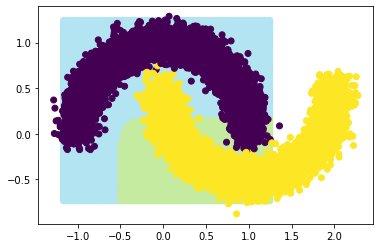

In [26]:
plt.scatter(x_test[:,0] , x_test[:,1] , c=y_pred , cmap = cmap) ## testing data points
plt.scatter(X[:,0] , X[:,1] , c=y) ## training data points
plt.show()

In [27]:
## bagging classifier attribute
print(bag_clf.base_estimator_)
print(bag_clf.oob_score_) ##  accuracy of bagging classifier on out of bag samples

DecisionTreeClassifier(max_depth=2)
0.9166


In [20]:
print(bag_clf.oob_decision_function_)
## we can see sample 1 belong to class 2 with probability 91%

[[0.08647197 0.91352803]
 [0.05227614 0.94772386]
 [0.44457374 0.55542626]
 ...
 [0.01356881 0.98643119]
 [0.91557708 0.08442292]
 [0.91989166 0.08010834]]


In [28]:
bag_clf.score(X,y)

0.9167

## Random Forest classifier

In [30]:
rf = RandomForestClassifier(n_estimators=100 , max_samples=100) ## n_estimators = np. of decision tree needed 

In [31]:
rf.fit(X,y)

RandomForestClassifier(max_samples=100)

In [32]:
rf.score(X,y)  ## accuracy

0.9818

In [33]:
ypred2 = rf.predict(x_test)

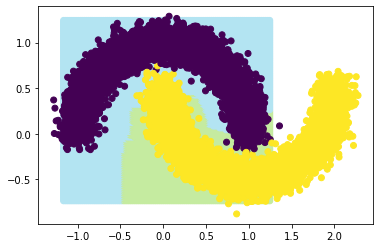

In [34]:
plt.scatter(x_test[:,0] , x_test[:,1] , c=ypred2 , cmap = cmap) ## testing data points
plt.scatter(X[:,0] , X[:,1] , c=y) ## training data points
plt.show()

## Regressor

#### Data generation

In [66]:
n = 500
x = np.linspace(-10 , 10 ,n)
noise = np.random.randn(n)
y = x**2 +13* noise

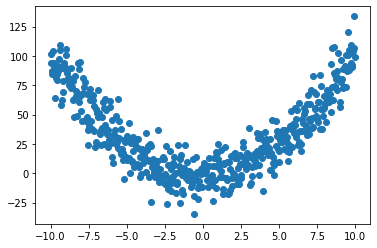

In [40]:
plt.scatter(x,y)
plt.show()

In [43]:
rf_reg = RandomForestRegressor(n_estimators = 10 , max_samples=0.2 , oob_score = True) 

In [46]:
rf_reg.fit(x.reshape(-1,1),y)

RandomForestRegressor(max_samples=0.2, n_estimators=10, oob_score=True)

## Prediction Line

In [47]:
ypred = rf_reg.predict(x.reshape(-1,1))

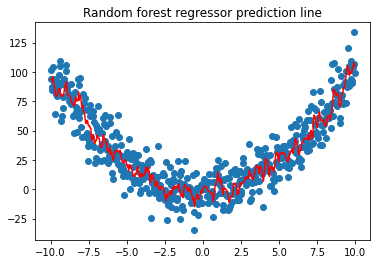

In [58]:
plt.scatter(x,y , label = "Training data")
plt.plot(x , ypred , c = 'red' , label = 'Prediction line')
plt.title("Random forest regressor prediction line")
plt.show()

In [54]:
dt1 = DecisionTreeRegressor()
dt1.fit(x.reshape(-1,1),y)
ypred1 = dt1.predict(x.reshape(-1,1))

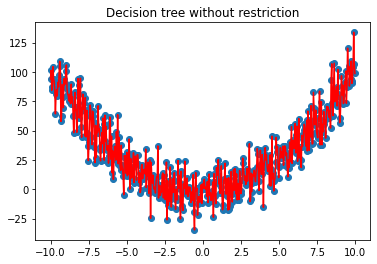

In [59]:
plt.scatter(x,y , label = "Training data")
plt.plot(x , ypred1 , c = 'red' , label = 'Prediction line')
plt.title("Decision tree without restriction")
plt.show()
## we get a highly overfitted data

In [67]:
depth = 3
dt2 = DecisionTreeRegressor(max_depth = depth)
dt2.fit(x.reshape(-1,1),y)
ypred2 = dt2.predict(x.reshape(-1,1))

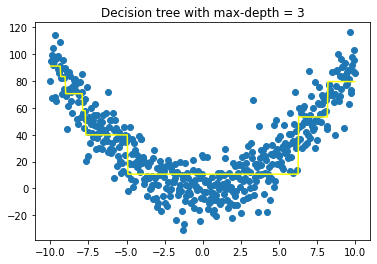

In [68]:
plt.scatter(x,y , label = "Training data")
plt.plot(x , ypred2 , c = 'yellow' , label = 'Prediction line')
plt.title(f"Decision tree with max-depth = {depth}")
plt.show()


### Boosting 

In [70]:
depth = 3
dt1 = DecisionTreeRegressor(max_depth = depth)
dt1.fit(x.reshape(-1,1),y)
ypred1 = dt1.predict(x.reshape(-1,1))

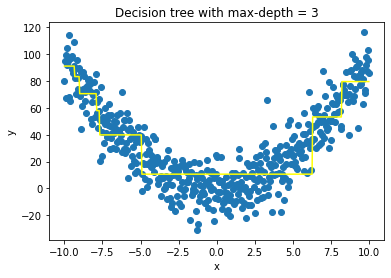

In [71]:
plt.scatter(x,y , label = "Training data")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x , ypred1 , c = 'yellow' , label = 'Prediction line')
plt.title(f"Decision tree with max-depth = {depth}")
plt.show()


In [73]:
residual1 = y - ypred1               ## in boosting we fit our model with residual of the predecssor model

In [74]:
depth = 3
dt2 = DecisionTreeRegressor(max_depth = depth)
dt2.fit(x.reshape(-1,1),residual1)     ## we are fitting the value with residual
ypred2 = dt2.predict(x.reshape(-1,1))

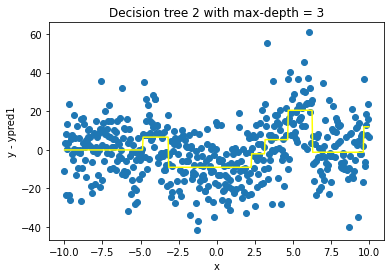

In [75]:
plt.scatter(x,residual1, label = "Training data")
plt.xlabel('x')
plt.ylabel('y - ypred1')
plt.plot(x , ypred2 , c = 'yellow' , label = 'Prediction line')
plt.title(f"Decision tree 2 with max-depth = {depth}")
plt.show()
## it plot line shows the error made by predecessor model

In [76]:
residual2 = residual1 - ypred2

In [77]:
depth = 3
dt3 = DecisionTreeRegressor(max_depth = depth)
dt3.fit(x.reshape(-1,1),residual2)     ## we are fitting the value with residual
ypred3 = dt3.predict(x.reshape(-1,1))

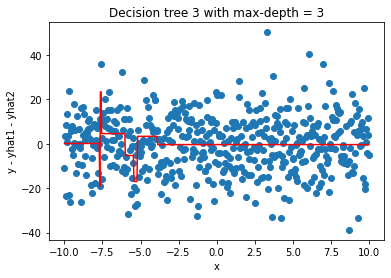

In [81]:
plt.scatter(x,residual2, label = "Training data")
plt.xlabel('x')
plt.ylabel('y - yhat1 - yhat2')
plt.plot(x , ypred3 , c = 'red' , label = 'Prediction line')
plt.title(f"Decision tree 3 with max-depth = {depth}")
plt.show()
## it plot line shows the error made by predecessor model

In [82]:
## final prediction
ypred = ypred1 + ypred2 + ypred3    #final prediction of ensembled model

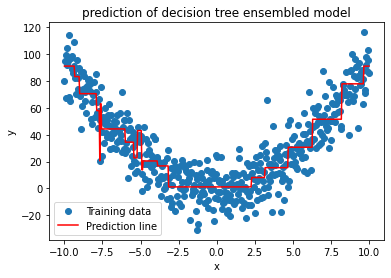

In [85]:
plt.scatter(x,y, label = "Training data")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x , ypred , c = 'red' , label = 'Prediction line')
plt.legend()
plt.title("prediction of decision tree ensembled model")
plt.show()
############################################################# we get the boosting ####################

we can do all the above work of boosting with this api from sklearn

In [86]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [87]:
gdreg = GradientBoostingRegressor()
gdreg.fit(x.reshape(-1,1),y)
ypred = gdreg.predict(x.reshape(-1,1))

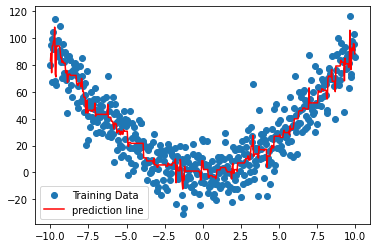

In [88]:
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.show()

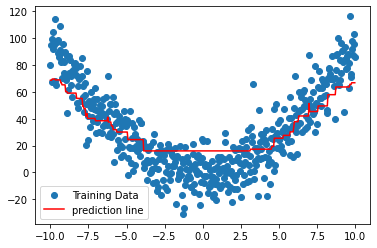

In [89]:
gdreg = GradientBoostingRegressor(n_estimators=10)
gdreg.fit(x.reshape(-1,1),y)
ypred = gdreg.predict(x.reshape(-1,1))
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.show()

C:\Users\Subhajit ghosh\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


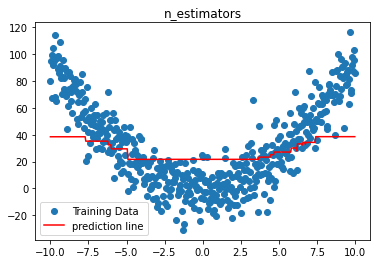

In [90]:
gdreg = GradientBoostingRegressor(n_estimators=3, loss='lad')
gdreg.fit(x.reshape(-1,1),y)
ypred = gdreg.predict(x.reshape(-1,1))
plt.scatter(x, y, label="Training Data")
plt.plot(x, ypred, c='red', label='prediction line')
plt.legend()
plt.title(f"n_estimators")
plt.show()